In [1]:
import pandas as pd
import numpy as np
import glob
from nltk.corpus import stopwords
from textblob import Word
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from nltk import ngrams
from collections import Counter
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [2]:
filename = 'oscars.csv'
data = pd.read_csv(filename)

In [3]:
data['Speech'] = data['Speech'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
data['sentiment'] = data['Speech'].apply(lambda x: TextBlob(x).sentiment[0] )
data.head()

,Oscars Year,Film Year,Actors,Gender,Played Off,Award,Speech,sentiment
0,2010,2009,1.0,0.0,0.0,Actor in a Leading Role,"oh! thank you, academy members! mom and dad, y...",0.550000
1,2010,2009,1.0,0.0,0.0,Actor in a Supporting Role,"oscar and penélope, that's an über bingo. i al...",0.059416
2,2010,2009,1.0,1.0,0.0,Actress in a Leading Role,did i really earn this or did i just wear you ...,0.248392
3,2010,2009,1.0,1.0,0.0,Actress in a Supporting Role,"first, i would like to thank the academy for s...",0.269974
4,2010,2009,0.0,0.0,0.0,Animated Feature Film,"boy, never did i dream that making a flip book...",0.558482


In [4]:
stop = stopwords.words('english')

male_pronouns = ["he", "him", "his", "himself", "man", "husband", "men"]
female_pronouns = ["her", "hers", "she", "herself", "she's", "woman", "wife", "women"]

for word in list(stop):
    if word in male_pronouns:
        stop.remove(word)
    if word in female_pronouns:
        stop.remove(word)

In [5]:
def mtotal(speech):
    i = 0
    speech = speech.split()
    for word in speech:
        if word in male_pronouns:
            i+=1
    return i

def ftotal(speech):
    i = 0
    speech = speech.split()
    for word in speech:
        if word in female_pronouns:
            i+=1
    return i

In [6]:
data["He/Him Count"] = data["Speech"].apply(lambda x: mtotal(x))
data["She/Her Count"] = data["Speech"].apply(lambda x: ftotal(x))

In [7]:
data['Speech'] = data['Speech'].apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
data['Speech'] = data['Speech'].str.replace('[^\w\s]','')
data['Speech'] = data['Speech'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

/tmp/ipykernel_12891/2625637159.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Speech'] = data['Speech'].str.replace('[^\w\s]','')


In [8]:
freq = pd.Series(' '.join(data['Speech']).split()).value_counts()[:10]
freq

thank      597
you        253
much       158
want       130
film       105
academy     93
like        92
u           85
love        80
know        70
dtype: int64

In [9]:
freq = list(freq.index)
data['Speech'] = data['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))

In [10]:
maledf = data[(data["Gender"] == 0.0)]

In [30]:
maledf['He/Him Count'].sum()

81

In [31]:
maledf['She/Her Count'].sum()

77

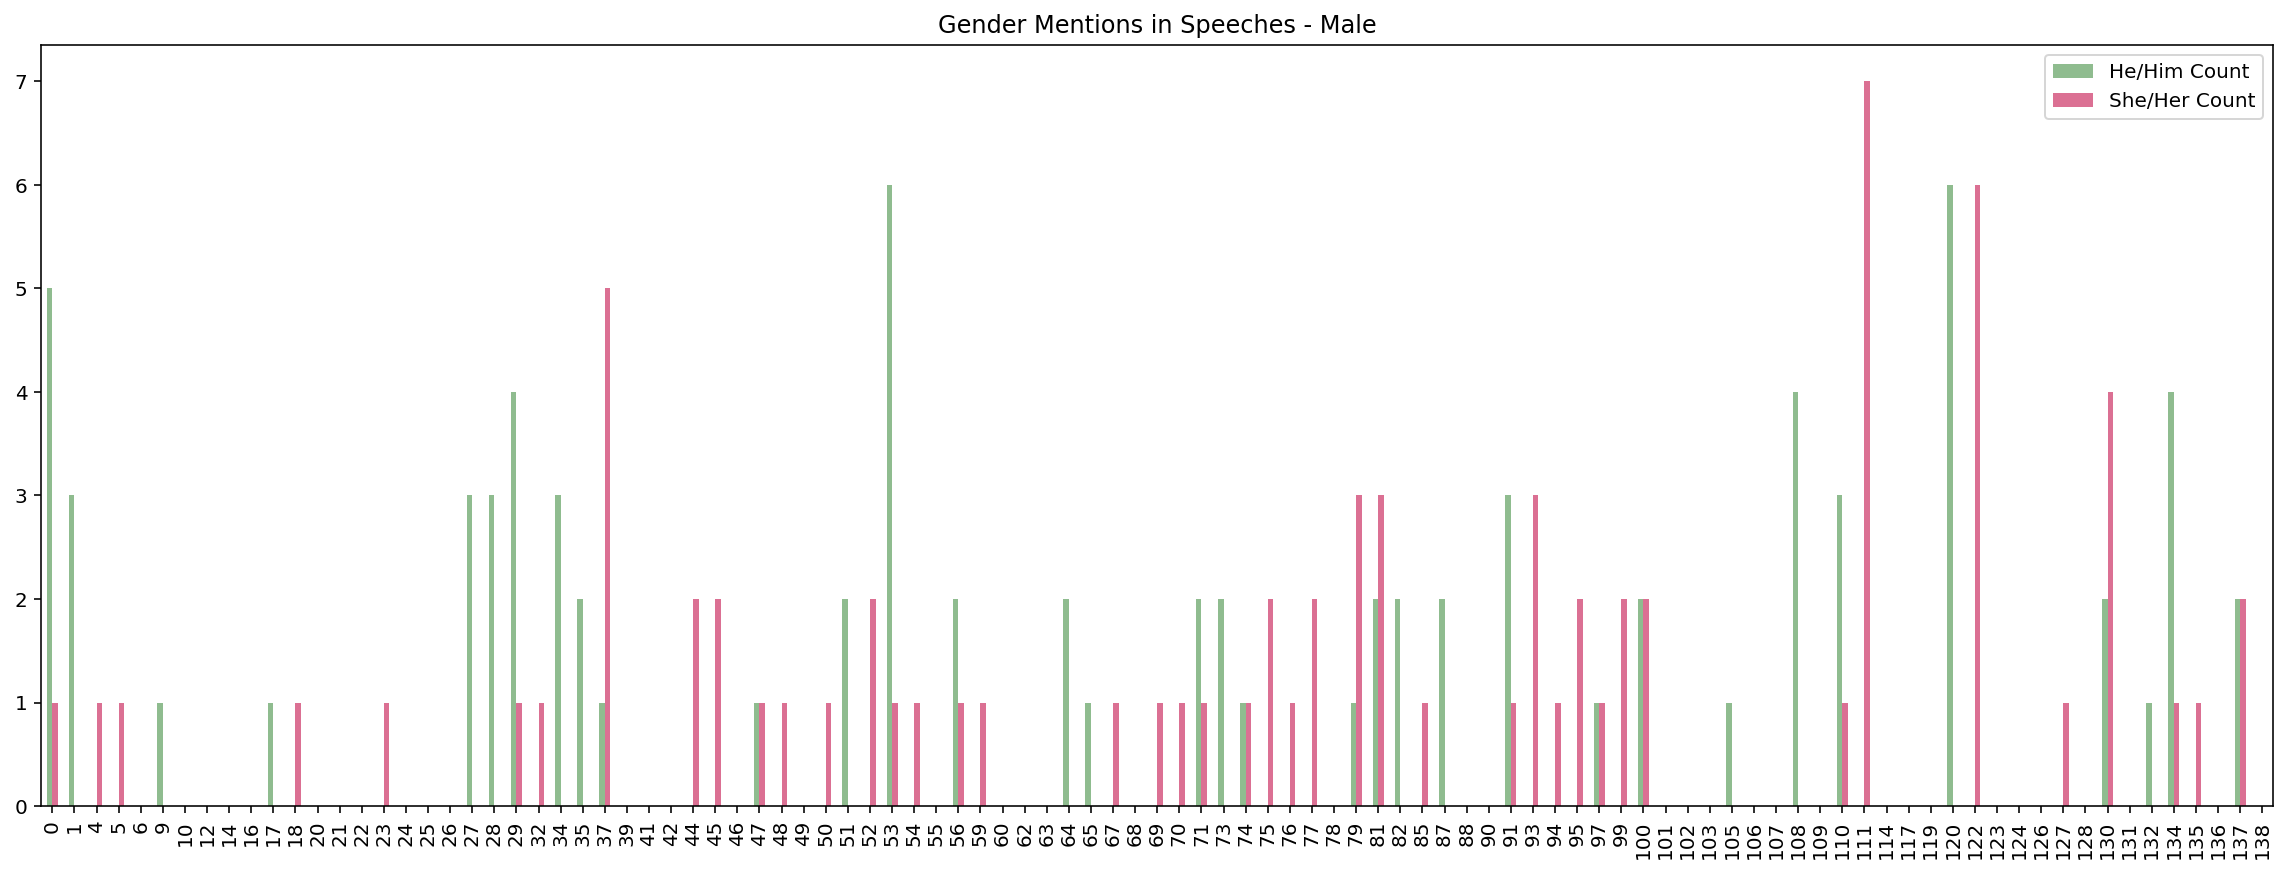

In [11]:
p1 = maledf[['He/Him Count', 'She/Her Count']]
p1.plot(kind='bar', figsize=(20,7), color=['darkseagreen', 'palevioletred'], title="Gender Mentions in Speeches - Male")
plt.savefig("m_gender_mentions.png")

In [12]:
femaledf = data[(data["Gender"] == 1.0)]

In [32]:
femaledf['He/Him Count'].sum()

18

In [33]:
femaledf['She/Her Count'].sum()

17

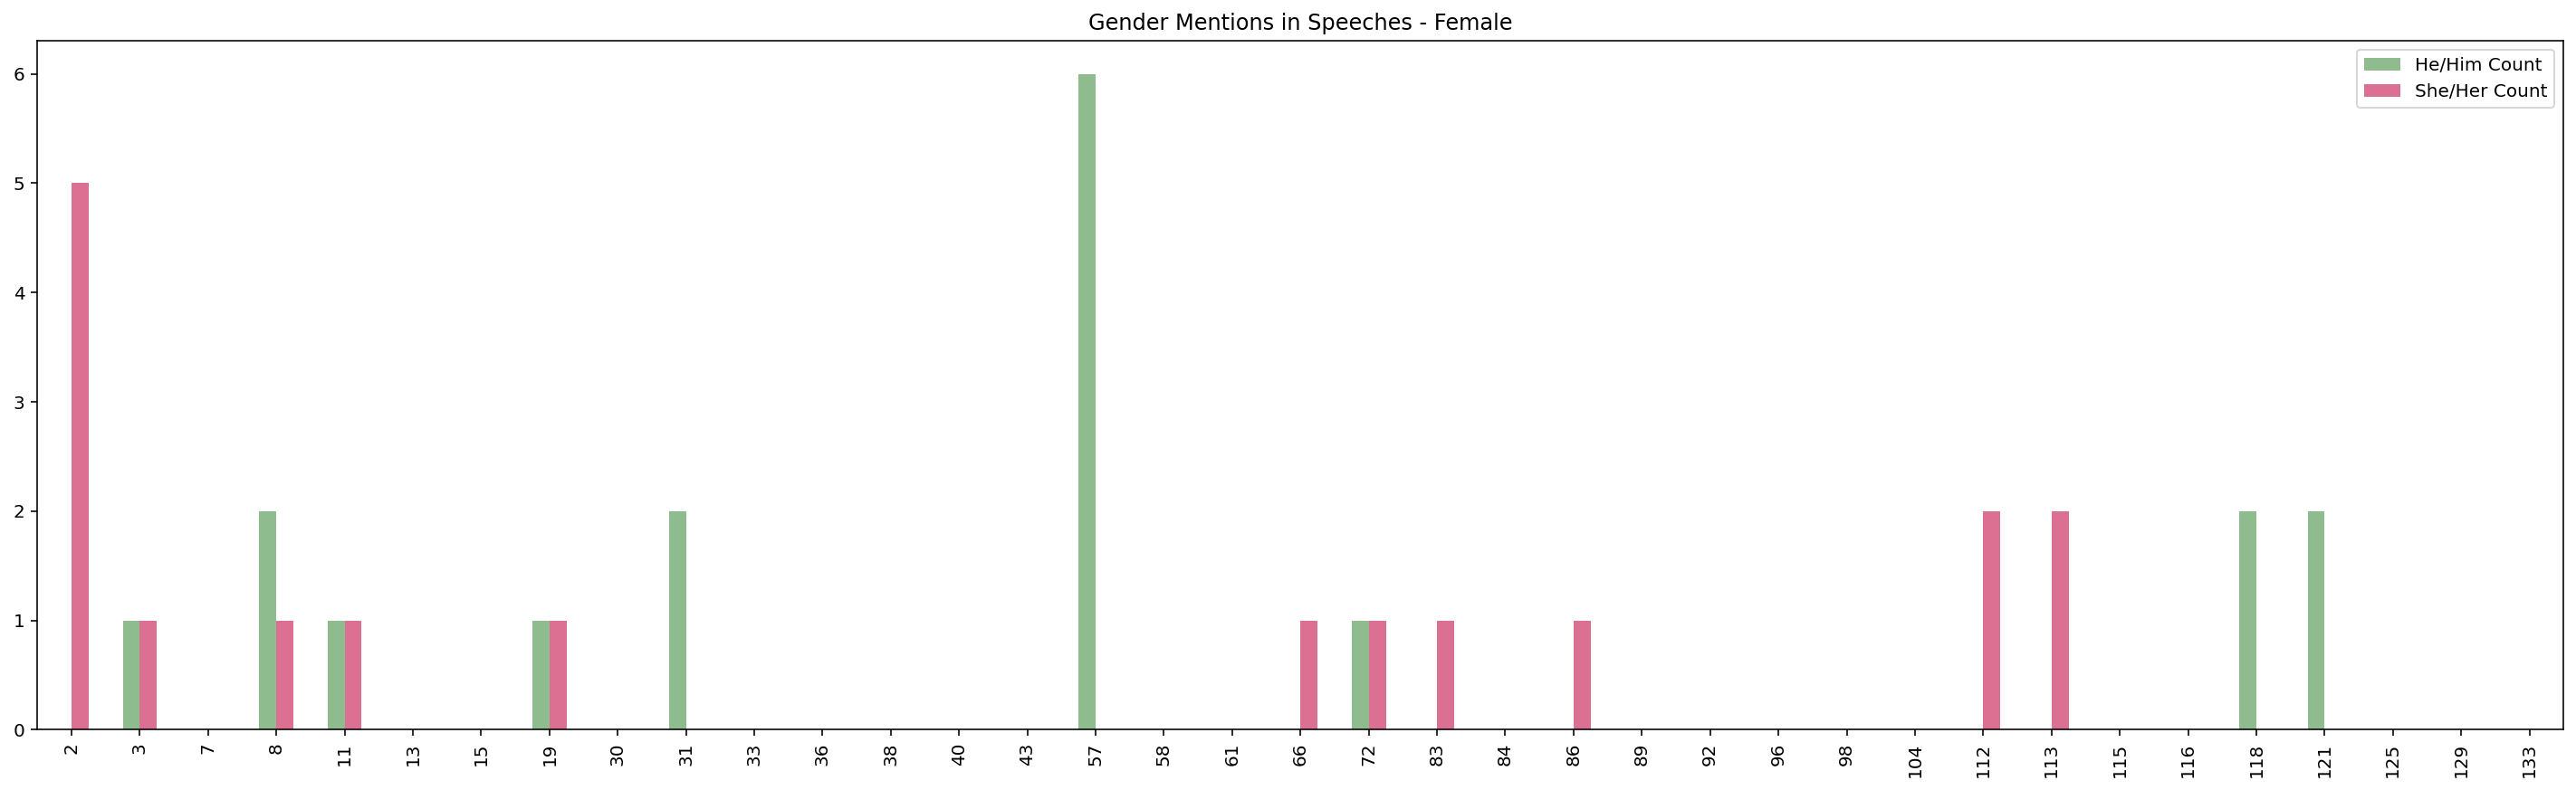

In [13]:
p2 = femaledf[['He/Him Count', 'She/Her Count']]
p2.plot(kind='bar', figsize=(25,7), color=['darkseagreen', 'palevioletred'], title="Gender Mentions in Speeches - Female")
plt.savefig("f_gender_mentions.png")

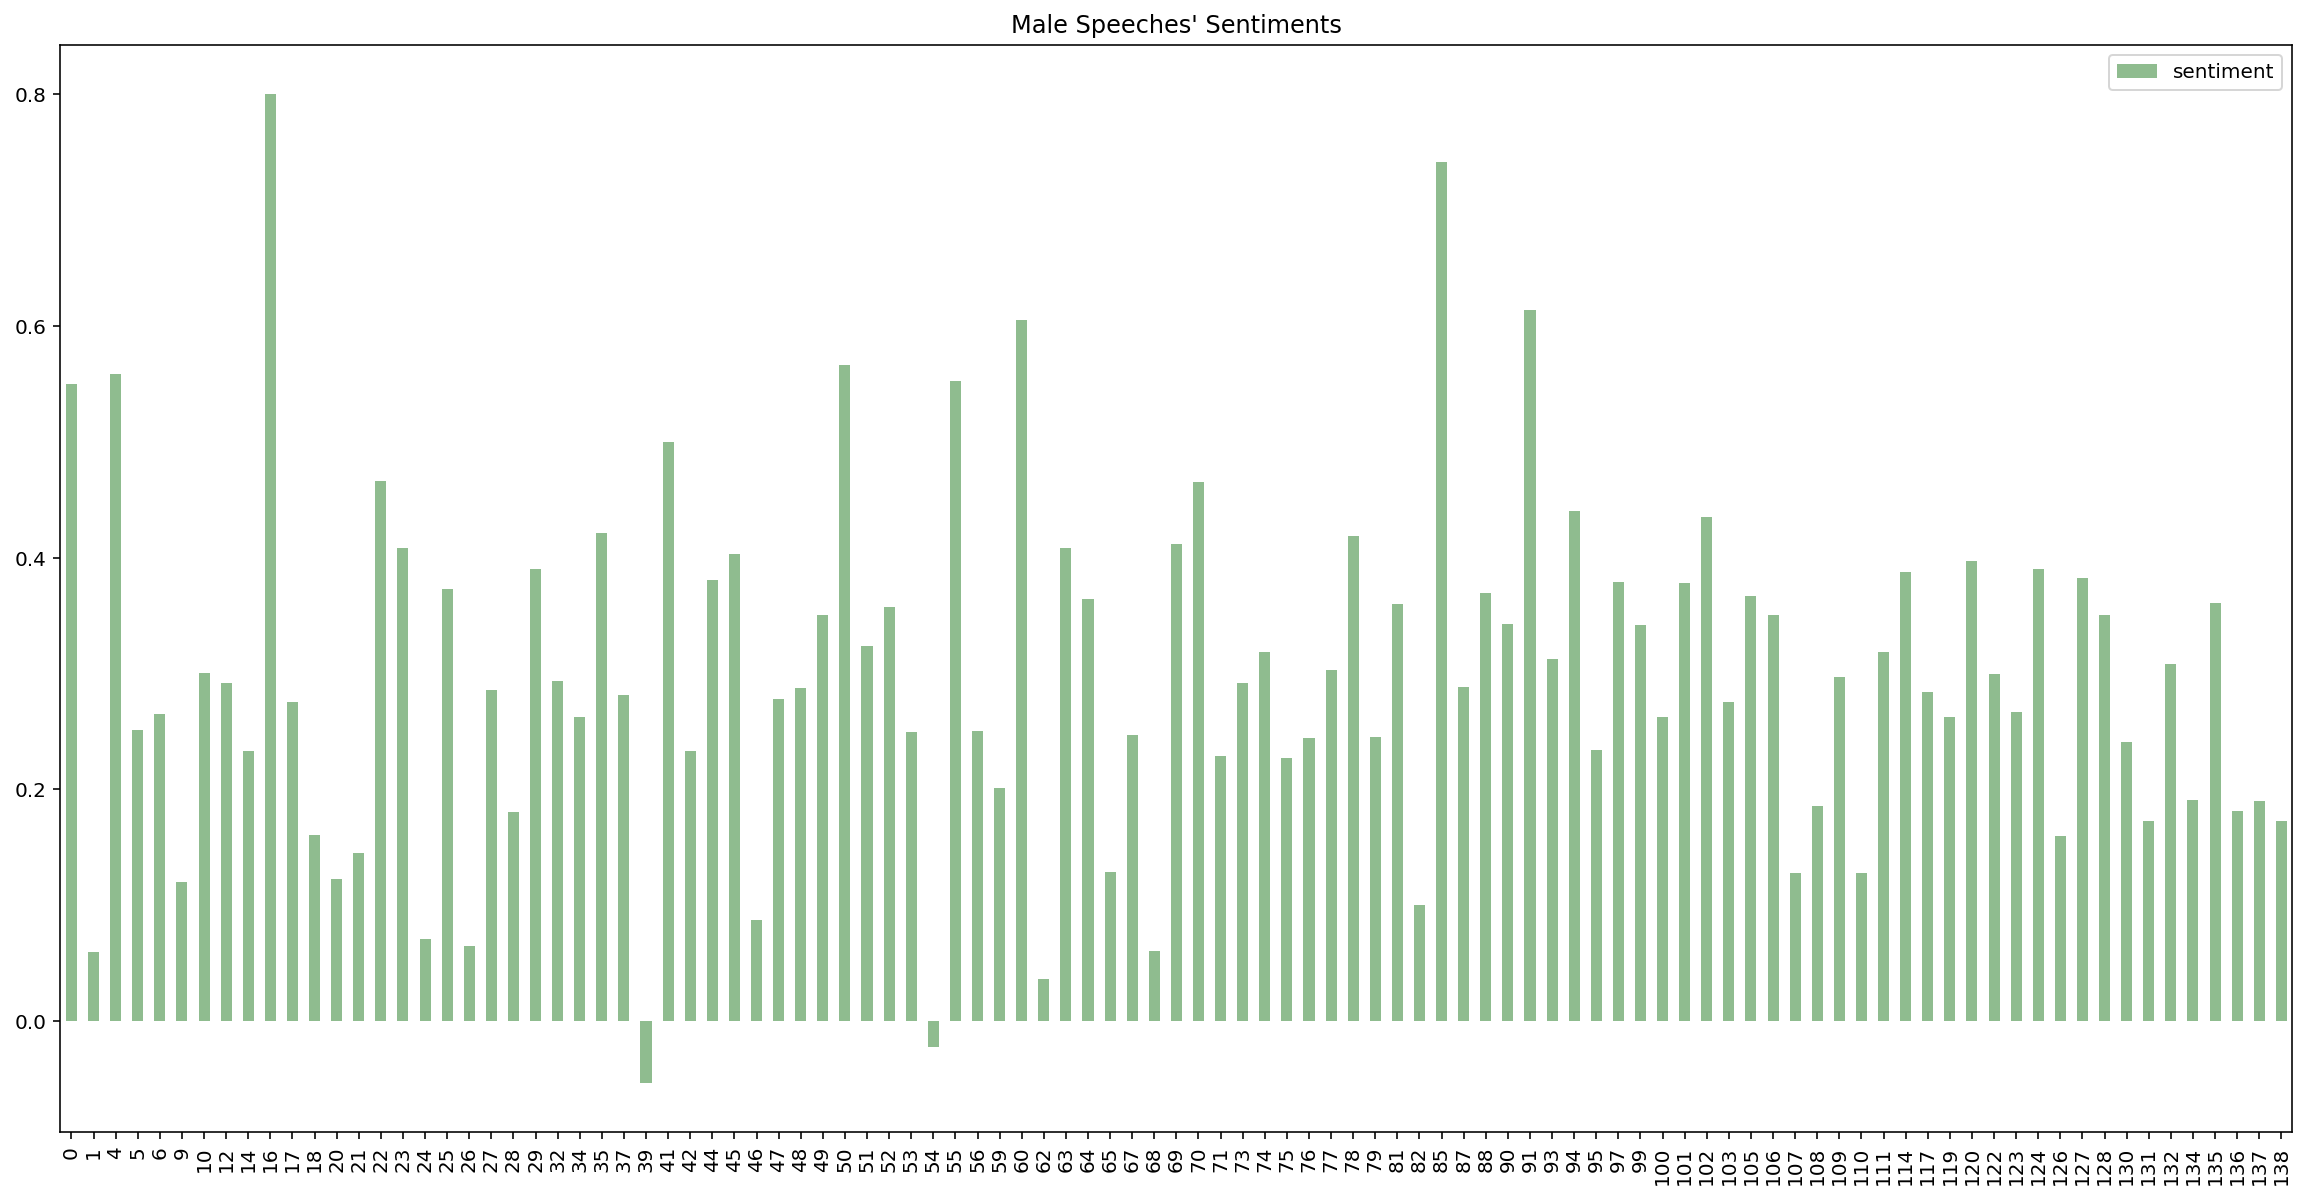

In [14]:
m_sentiment = maledf[["sentiment"]]
m_sentiment.plot(kind='bar', figsize=(20,10), color='darkseagreen', title="Male Speeches' Sentiments")
plt.savefig("m_sentiment.png")

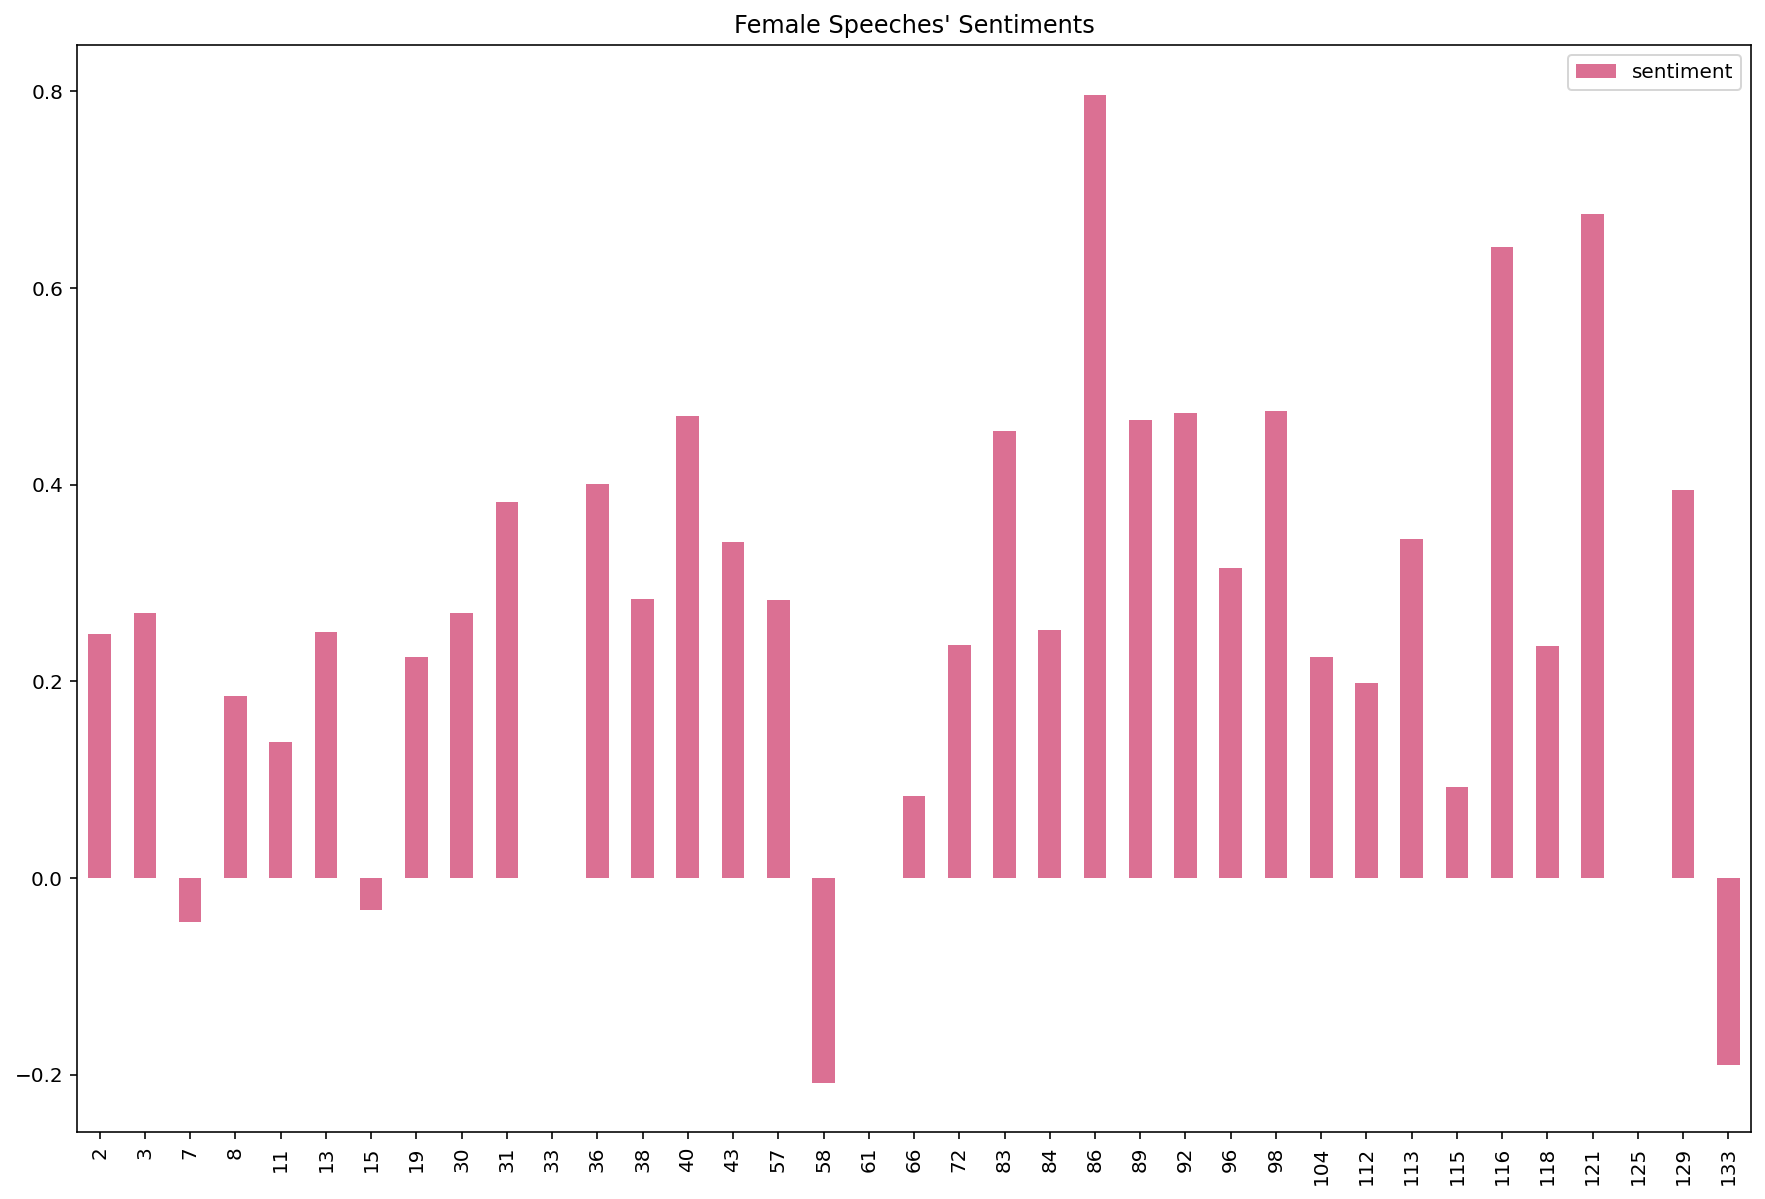

In [15]:
f_sentiment = femaledf[["sentiment"]]
f_sentiment.plot(kind='bar', figsize=(15,10), color='palevioletred', title="Female Speeches' Sentiments")
plt.savefig("f_sentiment.png")

In [16]:
lemmatizer = WordNetLemmatizer()

pd.DataFrame(' '.join(femaledf['Speech'].tolist()), columns=['Speech'], index=[0])
combined_f = str()

for talk in femaledf['Speech']:
    combined_f += talk

n_grams = TextBlob(combined_f).ngrams(3)

In [17]:
characters=[]
for i in ["he", "him", "his", "himself", "man", "husband", "men"]:
     characters.append(lemmatizer.lemmatize(i))        

In [18]:
female_male = []
for n in n_grams:
    if n[0] in characters:
        female_male.append(n[1])
        female_male.append(n[-1])
    if n[1] in characters:
        female_male.append(n[0])
        female_male.append(n[-1])
    if n[-1] in characters:
        female_male.append(n[1])
        female_male.append(n[0])

fm_counts = pd.Series(female_male).value_counts()
fm_counts

tonight    5
amazing    4
woman      4
eye        4
him        4
          ..
star       1
shorter    1
jim        1
team       1
me         1
Length: 83, dtype: int64

In [19]:
characters2=[]
for i in ["her", "hers", "she", "herself", "she's", "woman", "wife", "women"]:
     characters2.append(lemmatizer.lemmatize(i))

In [20]:
female_female = []
for n in n_grams:
    if n[0] in characters2:
        female_female.append(n[1])
        female_female.append(n[-1])
    if n[1] in characters2:
        female_female.append(n[0])
        female_female.append(n[-1])
    if n[-1] in characters2:
        female_female.append(n[0])
        female_female.append(n[1])
        
ff_counts = pd.Series(female_female).value_counts()
ff_counts

men               4
said              4
would             4
extraordinary     3
rehabilitating    2
                 ..
zakia             1
adversity         1
song              1
two               1
four              1
Length: 77, dtype: int64

In [21]:
pd.DataFrame(' '.join(maledf['Speech'].tolist()), columns=['Speech'], index=[0])
combined_m = str()

for talk in maledf['Speech']:
    combined_m += talk

n_grams2 = TextBlob(combined_m).ngrams(3)

In [22]:
male_male = []

for n in n_grams2:
    if n[0] in characters:
        male_male.append(n[1])
        male_male.append(n[-1])
    if n[1] in characters:
        male_male.append(n[-1])
        male_male.append(n[0])
    if n[-1] in characters:
        male_male.append(n[1])
        male_male.append(n[0])
        
mm_counts = pd.Series(male_male).value_counts()
mm_counts

his       10
say        8
im         8
story      8
is         8
          ..
javier     1
around     1
whole      1
tim        1
clear      1
Length: 300, dtype: int64

In [23]:
male_female = []

for n in n_grams2:
    if n[0] in characters2:
        male_female.append(n[1])
        male_female.append(n[-1])
    if n[1] in characters2:
        male_female.append(n[-1])
        male_female.append(n[0])
    if n[-1] in characters2:
        male_female.append(n[1])
        male_female.append(n[0])

mf_counts = pd.Series(male_female).value_counts()
mf_counts

she          13
amazing      12
wonderful    12
life         12
kid          11
             ..
inspire       1
different     1
deserves      1
lastly        1
smiling       1
Length: 261, dtype: int64

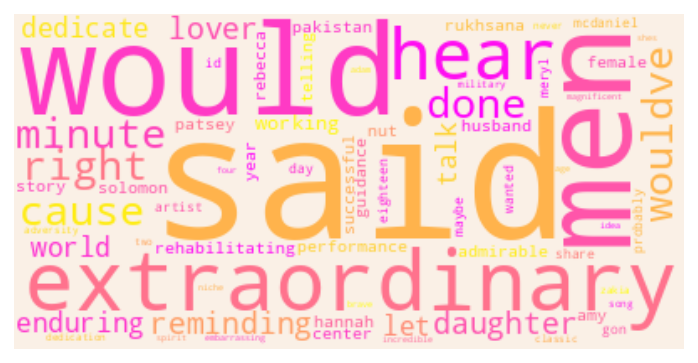

In [24]:
stop2 = stopwords.words('english')

ff_cloud = " ".join(female_female)
wordcloud = WordCloud(stopwords=stop2, background_color="linen", colormap='spring').generate(ff_cloud)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud.to_file("ff_wordcloud.png")

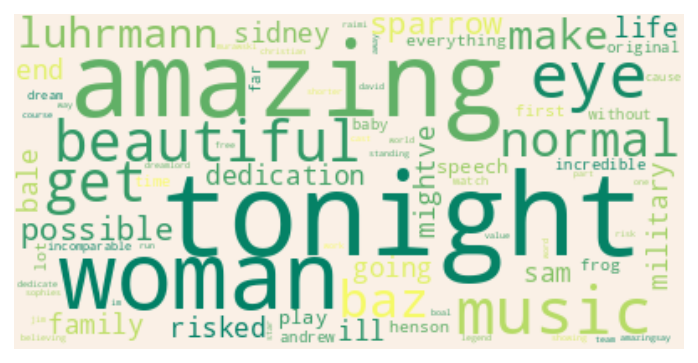

In [25]:
fm_cloud = " ".join(female_male)
wordcloud2 = WordCloud(stopwords=stop2, background_color="linen", colormap='summer').generate(fm_cloud)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud2.to_file("fm_wordcloud.png")

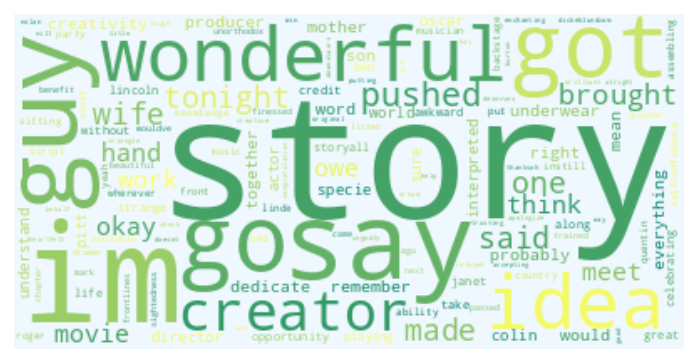

In [26]:
mm_cloud = " ".join(male_male)
wordcloud3 = WordCloud(stopwords=stop2, background_color="aliceblue", colormap="summer").generate(mm_cloud)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud3.to_file("mm_wordcloud.png")

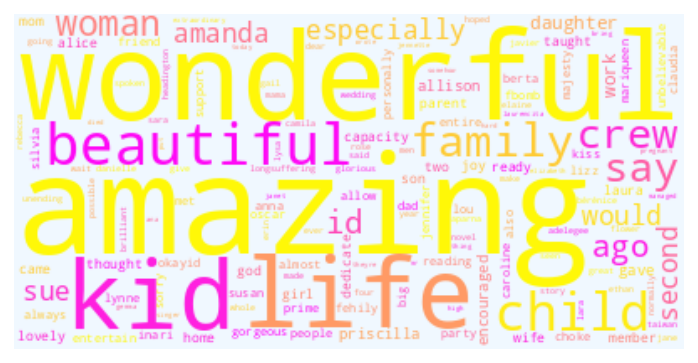

In [27]:
mf_cloud = " ".join(male_female)
wordcloud4 = WordCloud(stopwords=stop2, background_color="aliceblue", colormap='spring').generate(mf_cloud)
plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()
wordcloud4.to_file("mf_wordcloud.png")